# Pyber

*__Objective is to build a Bubble Plot that showcases the relationship between four key variables:__*


* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


*__In addition, you will be expected to produce the following three pie charts:__*


* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type
---------------------------------------

--------------------------------
*__Importing Dependencies__*

In [232]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---------------------------
*__Reading Both The CSV Files__*


In [233]:
# Reading Data
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

# drop one duplicate record with same city name, same ride_ids but different # of drivers
city_data = city_data.drop_duplicates('city')

# Printing Data
print(city_data.head())
print(ride_data_df.head())

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
          city           date   fare        ride_id
0     Sarabury  1/16/16 13:49  38.35  5400000000000
1    South Roy   1/2/16 18:42  17.49  4040000000000
2  Wiseborough  1/21/16 17:35  44.18  3650000000000
3  Spencertown  7/31/16 14:53   6.87  2240000000000
4   Nguyenbury    7/9/16 4:42   6.28  1540000000000


--------------------------------
*__ Merge Two Data Frames__ *

In [234]:
all_data_df = pd.merge(city_data, ride_data, on="city")
all_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,8/19/16 4:27,5.51,6250000000000
1,Kelseyland,63,Urban,4/17/16 6:59,5.54,7470000000000
2,Kelseyland,63,Urban,5/4/16 15:06,30.54,2140000000000
3,Kelseyland,63,Urban,1/25/16 20:44,12.08,1900000000000
4,Kelseyland,63,Urban,8/9/16 18:19,17.91,8780000000000


---------------------------------------------------------
- *Grouping By City*
- *Calculating Average Fare($) Per City*
- *Calculating Total Number of Rides Per City*
- *Calculating Total Number of Drivers Per City*
- *Calculating City Type (Urban, Suburban, Rural)*

In [235]:
# Creating Dataframes grouping by 'City'
by_city_df = all_data_df.groupby('city')

# Calculating Average Fare, Total Rides, Drivers Count and City Type (Doing Indexing As Well) Based Upon City Grouping
average_fare_city = by_city_df.mean()["fare"].rename("Average Fare ($) Per City")
total_rides = by_city_df.count()['ride_id'].rename("Total Number of Rides Per City")
drivers_count = by_city_df.mean()['driver_count'].rename("Total Number of Drivers Per City")
city_type = city_data.set_index('city')['type']

# Building Dataframe
city_info = pd.DataFrame({
   "Number of Rides": total_rides,
   "Average Fare": average_fare_city,
   "Number of Drivers": drivers_count,
   "City Type": city_type
                          })

# Building Dataframes For Each Rural, Urban, Suburban
rural_df = city_info[city_info['City Type'] == 'Rural']
urban_df = city_info[city_info['City Type'] == 'Urban']
suburban_df = city_info[city_info['City Type'] == 'Suburban']

--------------------------

__*Creating Plots*__




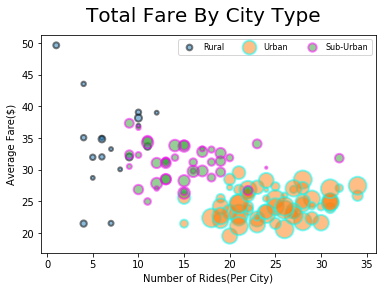

In [236]:
 
# Plotting For Rural, Urban And Suburban
rural_plot = plt.scatter(rural_df['Number of Rides'],rural_df['Average Fare'],
                         s=rural_df['Number of Drivers']*5, alpha=0.5, edgecolor='black', linewidth=2.0)
urban_plot = plt.scatter(urban_df['Number of Rides'],urban_df['Average Fare'],
                         s=urban_df['Number of Drivers']*5, alpha=0.5, edgecolor='cyan', linewidth=2.0)
suburban_plot = plt.scatter(suburban_df['Number of Rides'],suburban_df['Average Fare'],
                         s=suburban_df['Number of Drivers']*5, alpha=0.5, edgecolor='magenta', linewidth=2.0)

# Creating Legend
plt.legend((rural_plot, urban_plot, suburban_plot),
           ('Rural', 'Urban', 'Sub-Urban'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

# Creating xlabel, ylabel And subtitle
plt.xlabel("Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.suptitle('Total Fare By City Type', fontsize=20)
plt.show()

__*Observations of Bubble Plot*__
- Number of Drivers for Urban Areas are more based upon the size of the bubble.
- Number of Rides are on higher side in Urban areas, this could be because of population density is usually higher in the Urban areas.
- Average Fare is higher in Rural and Sub-Urban areas.
- Number of Drivers are least in Rural areas simply becasue the size of bubbles are smallest there.

---------------------
*********************
---------------------
__*Produce the following three pie charts:*__

- % of Total Fares by City Type
- % of Total Rides by City Type
- % of Total Drivers by City Type

--------------------
__*% of Total Fares by City Type*__
__*Steps*__
- Calculating The Sum of Average Fare For Each Category
- Creating Labels for the sections of our pie chart
- Creating The colors of each section of the pie chart
- Creating explode for the smallest section
- Creating the pie chart based upon the total fare
- Adding a title

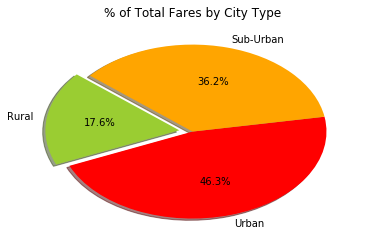

In [237]:
# Calculating The Sum of Average Fare For Each Category
total_fare = [round(rural_df.sum()['Average Fare'],2), round(urban_df.sum()['Average Fare'],2), 
              round(suburban_df.sum()['Average Fare'],2)]

# Labels for the sections of our pie chart
labels = ['Rural', 'Urban', 'Sub-Urban']

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Adding a title
plt.title('% of Total Fares by City Type')
plt.show()

--------------------
__*% of Total Rides by City Type*__
__*Steps*__
- Calculating The Sum of Number of Rides For Each Category
- Creating Labels for the sections of our pie chart
- Creating The colors of each section of the pie chart
- Creating explode for the smallest section
- Creating the pie chart based upon the total rides
- Adding a title

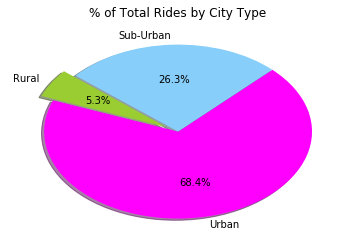

In [238]:
# Calculating The Sum of Number of Rides For Each Category
total_rides = [rural_df['Number of Rides'].sum(), urban_df['Number of Rides'].sum(), 
              suburban_df['Number of Rides'].sum()]

# Labels for the sections of our pie chart
labels = ['Rural', 'Urban', 'Sub-Urban']

# The colors of each section of the pie chart
colors = ["yellowgreen", "magenta", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Adding a title
plt.title('% of Total Rides by City Type')

plt.show()

--------------------
__*% of Total Rides by City Type*__
__*Steps*__
- Calculating The Sum of Number of Drivers For Each Category
- Creating Labels for the sections of our pie chart
- Creating The colors of each section of the pie chart
- Creating explode for the smallest section
- Creating the pie chart based upon the total drivers

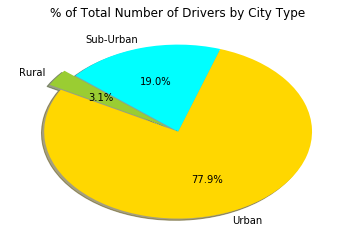

In [239]:
# Calculating The Sum of Number of Drivers For Each Category
total_drivers = [rural_df['Number of Drivers'].sum(), urban_df['Number of Drivers'].sum(), 
              suburban_df['Number of Drivers'].sum()]

# Labels for the sections of our pie chart
labels = ['Rural', 'Urban', 'Sub-Urban']

# The colors of each section of the pie chart
colors = ["yellowgreen", "gold", "cyan"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Adding a title
plt.title('% of Total Number of Drivers by City Type')

plt.show()

__*Observations of Pie Plot*__
- Clearly urban area has max drivers, fare and rides which is quite possible becasue of the population in the urban areas of the cities.
- Although number of rides in suburban and rural areas take 31.6% share out of total but fare share of these two combined is more than 50%. It might be more profitable to have a CAB service in these regions.
- There are just above 20% drivers out of total in the rural and suburban areas which could mean scarcity of professional drivers at these places. This could be a risk for a new business who is trying to target these regions.